# 5 Clustering

**Prerequisites:** Features has been calculated.

**Objective:** Allocate each customer to a cluster.

http://scikit-learn.org/stable/modules/clustering.html


### Used clustering scores:
from http://scikit-learn.org/    
        
**Silhoutte score**  
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html    
http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient  
    
**Calinski-Harabaz score**    
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabaz_score.html     
http://scikit-learn.org/stable/modules/clustering.html#calinski-harabaz-index

## Library Imports

In [1]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

%matplotlib inline

In [2]:
lrfmp_df = pd.read_csv("../02_feature engineering/data new/featureslrfmp.csv", encoding="utf-8", sep=",", index_col="CustID")

In [3]:
lrfmp_df.describe()

,Length (First/Last),Recency (3),Frequency (Monthly),Monetary (Revenue),Monetary (Revenue/Purchase),Periodicity (Std)
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,378.985714,76.747429,0.883571,806.478429,60.493143,34.282000
std,52.698347,51.677815,0.348745,382.502970,16.454843,18.378739
min,253.000000,8.000000,0.250000,232.500000,26.820000,11.350000
25%,339.500000,37.665000,0.620000,543.937500,47.557500,21.525000
50%,396.000000,61.670000,0.810000,743.815000,56.325000,31.075000
75%,421.500000,112.750000,1.067500,986.272500,69.517500,39.822500
max,451.000000,273.330000,1.940000,2134.950000,102.200000,123.040000


## 5.1 Data preprocessing
### 5.1.1 Scaling the data
    
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler

In [4]:
robustscaler = RobustScaler()
X = robustscaler.fit_transform(lrfmp_df)

## 5.2 Clustering
### 5.2.1 Evaluate clustering scores
Train k-means model for k from 2 to 10 and computation of the clustering scores.   

In [5]:
max_num_of_clusters = 10

In [6]:
var = X
possible_k = range(2, max_num_of_clusters + 1)

kmeans_list = [KMeans(n_clusters=k) for k in possible_k]

sum_of_squared_scores = []
silhouette_scores = []
calinski_harabaz_scores = []

for kmeans in kmeans_list:
    kmeans.fit(var)
    
    sum_of_squared_scores.append(kmeans.score(var))
    labels = kmeans.labels_
    
    silhouette_scores.append(metrics.silhouette_score(var, labels, sample_size=1000,
                                                      metric="euclidean"))
    calinski_harabaz_scores.append(metrics.calinski_harabaz_score(var, labels))

Create a scoring dataframe.

In [7]:
result_df = pd.DataFrame({"Number of clusters":possible_k, 
                          "Sum of squared score":sum_of_squared_scores,
                          "Silhouette score":silhouette_scores, 
                          "Calinski-Harabaz score":calinski_harabaz_scores})

#Saving clustering scores
result_df.to_csv("data new/overview clustering scores.csv", encoding="utf-8", sep=",")

result_df

,Number of clusters,Sum of squared score,Silhouette score,Calinski-Harabaz score
0,2,-174.733025,0.299901,34.366293
1,3,-136.577442,0.261884,31.019188
2,4,-111.576617,0.278825,29.864781
3,5,-89.580536,0.287439,31.465861
4,6,-80.228167,0.266981,29.166829
5,7,-72.354928,0.217185,27.671941
6,8,-65.665699,0.228600,26.622410
7,9,-60.376412,0.235134,25.594692
8,10,-53.407609,0.254704,26.167702


In [8]:
def plot_scores(cluster_col, score_col, output_path=None):

    def plot(cluster_col,score_col):
        g = sns.regplot(x=cluster_col, y=score_col, data=result_df,
                        fit_reg=False, color="Grey")
        g.set_title(score_col+"\n", fontsize=20, x=0.45)
        g.set_ylabel("Score")
        sns.despine()
        return plt.gcf(), g

    def set_style():
        rc = {"axes.labelsize": 13, "xtick.labelsize": 11, "ytick.labelsize": 11, "lines.markersize": 8.0}
        sns.set(font="Arial",rc=rc)
        sns.set_style("ticks")

    def set_size(g):
        g.set_size_inches(8,5)
        plt.tight_layout()

    set_style()
    fig, g = plot(cluster_col, score_col)
    set_size(fig)
    
    if output_path is not None:
        fig.savefig(output_path,dpi=350)

**Sum of squared score**

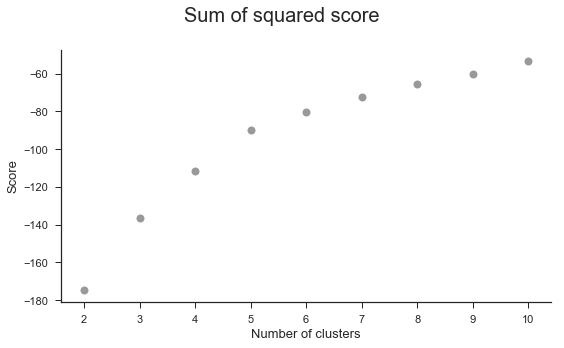

In [9]:
plot_scores("Number of clusters", "Sum of squared score", "visualizations/sum of squared score")

**Silhoutte score**

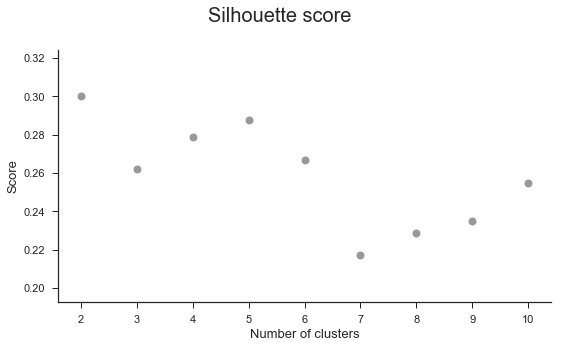

In [10]:
plot_scores("Number of clusters", "Silhouette score","visualizations/silhouette score")

**Calinski-Harabaz score**

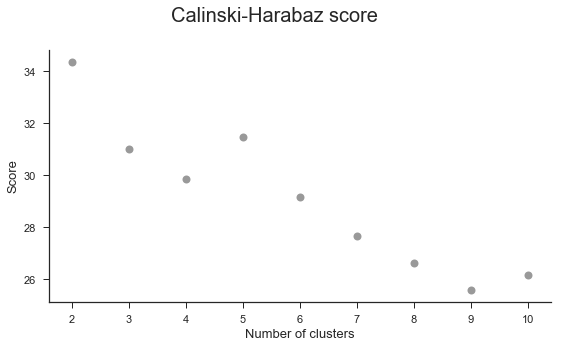

In [11]:
plot_scores("Number of clusters", "Calinski-Harabaz score","visualizations/calinski-harabaz score")

### 5.2.2 Process clustering

Selected number of clusters:    **k = 5**

In [12]:
final_kmeans = KMeans(n_clusters=5)

In [13]:
final_kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
final_kmeans.labels_

array([0, 2, 2, 4, 4, 3, 2, 1, 3, 0, 0, 3, 1, 0, 4, 3, 2, 2, 2, 0, 4, 3,
       4, 0, 2, 0, 3, 3, 2, 2, 2, 0, 2, 2, 3, 3, 2, 2, 3, 4, 0, 3, 4, 2,
       4, 2, 2, 3, 4, 2, 2, 0, 2, 3, 4, 3, 0, 0, 4, 4, 4, 2, 3, 2, 3, 2,
       4, 1, 2, 4], dtype=int32)

In [15]:
lrfmp_df["Cluster"] = final_kmeans.labels_

In [16]:
#Saving clustering
lrfmp_df.to_csv("data new/clustered.csv", encoding="utf-8", sep=",")

In [17]:
lrfmp_df.head()

,Length (First/Last),Recency (3),Frequency (Monthly),Monetary (Revenue),Monetary (Revenue/Purchase),Periodicity (Std),Cluster
CustID,,,,,,,
1601060367199,442,8.00,1.81,1514.71,52.23,12.18,0
1604011635399,416,86.33,0.50,360.17,45.02,35.96,2
1604121617999,389,23.33,0.80,684.38,57.03,37.40,2
1605041917999,411,115.00,0.50,307.72,38.47,49.21,4
1610010812799,319,150.67,0.50,550.89,68.86,57.35,4
